<a href="https://colab.research.google.com/github/Leonnmarshall/Redes-de-Informa-o/blob/main/script_biblio_redes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [161]:
#coleta e tratamento de dados da pesquisa

In [162]:
#importando as bibliotecas
import pandas as pd  #biblioteca utilizada para criar os dataframes
import numpy as np  #biblioteca utilizada para trabalhar com vetores ou matrizes
import matplotlib.pyplot as plt #biblioteca utilizada para construção de gráficos
from sklearn.cluster import KMeans #biblioteca utilizada para a construção K-means
from sklearn.decomposition import PCA #biblioteca utilizada para a construção do PCA
from sklearn.preprocessing import StandardScaler #biblioteca utilizada para a normalização dos dados
import seaborn as sns #biblioteca utilizada para o plot dos gráficos de forma mais "bonita"
import matplotlib.colors as mcolors

In [163]:
#upload do dataset
df_ciencia = pd.read_csv('coleta.csv')

In [164]:
#mostrando as 5 primeiras linhas do dataset
df_ciencia.head(5)

,Carimbo de data/hora,idade,areaInteresse,busca,compartilha,frequencia,recebenot,topaCanal,estudo,frequenciaAnun
0,19/03/2021 13:47:57,"35,45",7,2,2,2,1,1,3,1
1,19/03/2021 13:48:23,"25,35",7,1,2,3,1,1,3,1
2,19/03/2021 13:48:25,"25,35",7,1,4,1,3,1,3,2
3,19/03/2021 13:49:19,"25,35",6,5,4,2,1,1,3,2
4,19/03/2021 14:16:29,"35,45",6,1,5,1,1,3,3,2


In [165]:
df_ciencia.dtypes


Carimbo de data/hora    object
idade                   object
areaInteresse            int64
busca                    int64
compartilha              int64
frequencia               int64
recebenot                int64
topaCanal                int64
estudo                   int64
frequenciaAnun           int64
dtype: object

In [166]:
#encontrando as características do dataset
df_ciencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Carimbo de data/hora  42 non-null     object
 1   idade                 42 non-null     object
 2   areaInteresse         42 non-null     int64 
 3   busca                 42 non-null     int64 
 4   compartilha           42 non-null     int64 
 5   frequencia            42 non-null     int64 
 6   recebenot             42 non-null     int64 
 7   topaCanal             42 non-null     int64 
 8   estudo                42 non-null     int64 
 9   frequenciaAnun        42 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 3.4+ KB


In [167]:
#encontrando as colunas
df_ciencia.columns

Index(['Carimbo de data/hora', 'idade', 'areaInteresse', 'busca',
       'compartilha', 'frequencia', 'recebenot', 'topaCanal', 'estudo',
       'frequenciaAnun'],
      dtype='object')

In [168]:
#pegando apenas os dados numéricos
df_ciencia=df_ciencia[['areaInteresse', 'busca',
       'compartilha', 'frequencia', 'recebenot', 'topaCanal', 'estudo',
       'frequenciaAnun']]

In [169]:
#verificando as mudanças
df_ciencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   areaInteresse   42 non-null     int64
 1   busca           42 non-null     int64
 2   compartilha     42 non-null     int64
 3   frequencia      42 non-null     int64
 4   recebenot       42 non-null     int64
 5   topaCanal       42 non-null     int64
 6   estudo          42 non-null     int64
 7   frequenciaAnun  42 non-null     int64
dtypes: int64(8)
memory usage: 2.8 KB


In [170]:
#verificando a existencia de valores nulos
df_ciencia.isnull().sum()

areaInteresse     0
busca             0
compartilha       0
frequencia        0
recebenot         0
topaCanal         0
estudo            0
frequenciaAnun    0
dtype: int64

In [171]:
#encontra o número de linhas e colunas dos dados
df_ciencia.shape

(42, 8)

** **negrito**Conhecendo o dataset**

**Criando o dataset e aferindo as estastiticas de contagem, média, max, percentil**

In [172]:
#@title Texto de título padrão
#encontrando as "estatísticas" da coleta
df_ciencia.describe()

,areaInteresse,busca,compartilha,frequencia,recebenot,topaCanal,estudo,frequenciaAnun
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,5.452381,2.880952,2.547619,1.500000,1.452381,1.595238,2.714286,1.928571
std,2.210864,2.297426,1.151931,0.552158,0.739228,0.766987,0.553733,1.021545
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.250000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000,1.000000
50%,6.000000,2.000000,2.000000,1.000000,1.000000,1.000000,3.000000,2.000000
75%,7.000000,5.000000,4.000000,2.000000,2.000000,2.000000,3.000000,2.000000
max,8.000000,7.000000,5.000000,3.000000,3.000000,3.000000,3.000000,4.000000


In [173]:
import pandas as pd
import seaborn as sn

In [174]:
# análise de correlação


In [175]:
correlation = df_ciencia.corr()


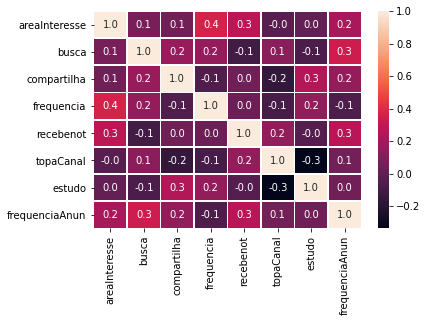

In [176]:
plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.8)
plot

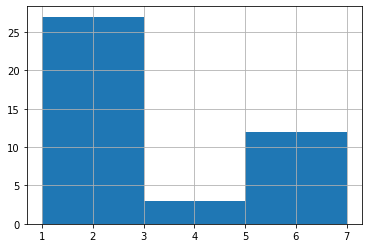

In [177]:
#plotando alguns gráficos
df_ciencia['busca'].hist(bins=3);  #histograma

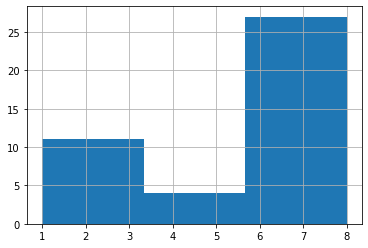

In [178]:
#plotando alguns gráficos
df_ciencia['areaInteresse'].hist(bins=3);  #histograma

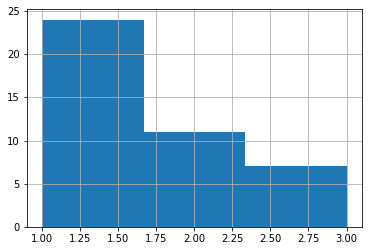

In [179]:
#plotando alguns gráficos
df_ciencia['topaCanal'].hist(bins=3);  #histograma

In [180]:
import matplotlib.colors as mcolors


**Identificando possíveis outliers**

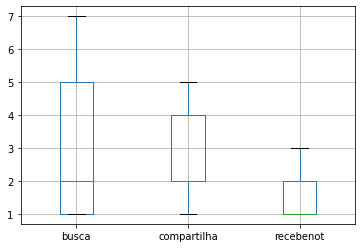

In [181]:
#realizando o plot do boxplot
df_ciencia[['busca', 'compartilha', 'recebenot']].boxplot()

**Inicalizando o PCA**

In [182]:
#Normalização com média 0 e desvio 1
normaliza = StandardScaler() #objeto para a normalização
X_std=normaliza.fit_transform(df_ciencia) #aplica a normalização

In [183]:
X_std

array([[ 0.70849158, -0.38810003, -0.4811547 ,  0.91651514, -0.6193823 ,
        -0.78548028,  0.52223297, -0.92000581],
       [ 0.70849158, -0.828646  , -0.4811547 ,  2.74954542, -0.6193823 ,
        -0.78548028,  0.52223297, -0.92000581],
       [ 0.70849158, -0.828646  ,  1.27610595, -0.91651514,  2.11893944,
        -0.78548028,  0.52223297,  0.07076968],
       [ 0.25069702,  0.9335379 ,  1.27610595,  0.91651514, -0.6193823 ,
        -0.78548028,  0.52223297,  0.07076968],
       [ 0.25069702, -0.828646  ,  2.15473627, -0.91651514, -0.6193823 ,
         1.85373346,  0.52223297,  0.07076968],
       [ 0.70849158, -0.38810003, -0.4811547 ,  0.91651514,  2.11893944,
        -0.78548028,  0.52223297, -0.92000581],
       [ 0.70849158,  1.37408388, -0.4811547 ,  0.91651514,  2.11893944,
         1.85373346, -1.30558242,  0.07076968],
       [-0.6648921 ,  0.9335379 , -0.4811547 ,  0.91651514, -0.6193823 ,
        -0.78548028,  0.52223297,  0.07076968],
       [ 0.25069702,  1.81462985

**Árvore de Decisão**

In [184]:
#importando as bibliotecas
from sklearn.tree import DecisionTreeClassifier # importa o classificador árvore de decisão
from sklearn import metrics #importa as métricas para avaliação

In [185]:
#preparando o dataset
df_ciencia_arvore=pd.read_csv('coleta.csv')

In [186]:
#transformando os dados para numéricos
df_ciencia_arvore['topaCanal']=pd.to_numeric(df_ciencia_arvore['topaCanal'], errors='coerce')
df_ciencia_arvore['areaInteresse']=pd.to_numeric(df_ciencia_arvore['areaInteresse'], errors='coerce')

In [187]:
#transformando os dados para numéricos
df_ciencia_arvore['busca']=pd.to_numeric(df_ciencia_arvore['busca'], errors='coerce')
df_ciencia_arvore['compartilha']=pd.to_numeric(df_ciencia_arvore['compartilha'], errors='coerce')

In [188]:
#retirando os valores nulos
df_ciencia_arvore.dropna(inplace=True)

In [189]:
#mostrando o dataset
df_ciencia_arvore.head()

,Carimbo de data/hora,idade,areaInteresse,busca,compartilha,frequencia,recebenot,topaCanal,estudo,frequenciaAnun
0,19/03/2021 13:47:57,"35,45",7,2,2,2,1,1,3,1
1,19/03/2021 13:48:23,"25,35",7,1,2,3,1,1,3,1
2,19/03/2021 13:48:25,"25,35",7,1,4,1,3,1,3,2
3,19/03/2021 13:49:19,"25,35",6,5,4,2,1,1,3,2
4,19/03/2021 14:16:29,"35,45",6,1,5,1,1,3,3,2


In [190]:
df_ciencia.apply(lambda x: sum(x.isnull()),axis=0)


areaInteresse     0
busca             0
compartilha       0
frequencia        0
recebenot         0
topaCanal         0
estudo            0
frequenciaAnun    0
dtype: int64

In [191]:
#adicionando a coluna de classificação
df_ciencia_arvore['is_efficient']=df_ciencia_arvore['topaCanal'].map(lambda x: 1 if x>5 else 0)

In [192]:
df_ciencia_arvore.head()

,Carimbo de data/hora,idade,areaInteresse,busca,compartilha,frequencia,recebenot,topaCanal,estudo,frequenciaAnun,is_efficient
0,19/03/2021 13:47:57,"35,45",7,2,2,2,1,1,3,1,0
1,19/03/2021 13:48:23,"25,35",7,1,2,3,1,1,3,1,0
2,19/03/2021 13:48:25,"25,35",7,1,4,1,3,1,3,2,0
3,19/03/2021 13:49:19,"25,35",6,5,4,2,1,1,3,2,0
4,19/03/2021 14:16:29,"35,45",6,1,5,1,1,3,3,2,0


In [193]:
df_ciencia_arvore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 41
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Carimbo de data/hora  42 non-null     object
 1   idade                 42 non-null     object
 2   areaInteresse         42 non-null     int64 
 3   busca                 42 non-null     int64 
 4   compartilha           42 non-null     int64 
 5   frequencia            42 non-null     int64 
 6   recebenot             42 non-null     int64 
 7   topaCanal             42 non-null     int64 
 8   estudo                42 non-null     int64 
 9   frequenciaAnun        42 non-null     int64 
 10  is_efficient          42 non-null     int64 
dtypes: int64(9), object(2)
memory usage: 3.9+ KB


In [195]:
#definindo as entradas e as saídas
entradas_arvore=df_ciencia_arvore[['areaInteresse', 'busca', 'compartilha','topaCanal']]
saidas_arvore=df_ciencia_arvore['is_efficient']

In [221]:
#definindo as entradas e as saídas
entradas_arvore=df_ciencia_arvore[['topaCanal','frequencia','recebenot','frequenciaAnun']]
saidas_arvore=df_ciencia_arvore['is_efficient']

In [222]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [223]:
#realiza a divisão dos dados entre treinamento e teste
from sklearn.model_selection import train_test_split   # função que realiza a divisão do dataset
X_train, X_test, y_train, y_test = train_test_split(entradas_arvore, saidas_arvore, test_size=0.8)# divide 20% para teste

In [224]:
# Cria o objeto de classificação através do 
clf = DecisionTreeClassifier()

# Realiza o treinamento do classificador
clf = clf.fit(X_train,y_train)

#Realiza a previsão de classificaçao 
y_pred = clf.predict(X_test)

In [225]:
#constroi a matriz de confusão para comparar o modelo criado
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[34]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34

